## LIVE 2 : Let's solve slightly 'harder' problems than in the previous session

- Yesterday's focus: Simple programs, reading error-messages, reading references, fixing bugs
- Today's focus: Mathematical programming problems relevant to ML/AI, common-errors, testing code, loops/iteration and recursion.
- Prereq: Python-programming. I will introduce "new" concepts as we go.
- I have asked some of these problems and thier variations in actual interviews. 
 

In [1]:
# check Python version to avoid version-related bugs/errors
import sys
print (sys.version)

3.5.2 (default, Oct  8 2019, 13:06:37) 
[GCC 5.4.0 20160609]


### Problem 1: Find peaks/max in an list
- problem definition


In [2]:
A = [1,3,4,5,7,6,4,5,10,1];
print(A)

[1, 3, 4, 5, 7, 6, 4, 5, 10, 1]


In [3]:
# Peaks: 7,10

# Arrive at the logic and what coding-constructs we ahev to use to solve it.


# Peak: A[i-1] <= A[i] >= A[i+1]

for i in range(1, len(A) - 1): # 1 and -1 are important
    if (A[i] >= A[i-1]) and (A[i] >= A[i+1]):
        print(A[i]);

7
10


In [4]:
print(len(A));

10


In [5]:
for i in range(1, len(A) - 1): # 1 and -1 are important
    if (A[i] >= A[i-1]) and (A[i] >= A[i+1]):
        print(A[i]);

7
10


In [6]:
# There is a bug in the above solution. Find it...

In [6]:
A = [11,3,4,5,7,6,4,16,10,15];

for i in range(1, len(A) - 1): # 1 and -1 are important
    if (A[i] >= A[i-1]) and (A[i] >= A[i+1]):
        print(A[i]);

7
16


In [7]:
# what about 11 and 15?

# boundary case: DONT MISS THEM. Very important in interviews
if A[0] >= A[1]:
    print(A[0])
    
for i in range(1, len(A) - 1): # 1 and -1 are important
    if (A[i] >= A[i-1]) and (A[i] >= A[i+1]):
        print(A[i]);

# boundary case
if A[len(A)-1] >= A[len(A)-2]:
    print(A[len(A)-1])


11
7
16
15


In [8]:
# LESSON: Donot forget boundary cases

#Question: Time Complexity = ?

#### Exercise: 
1. Find peaks which are max values in a window of size 2 on both sides.
2. Use scipy.signal.find_peaks [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html]

Additional reading: More efficient algos using D&Q @ http://courses.csail.mit.edu/6.006/spring11/lectures/lec02.pdf

*******
*******
*******
*******
*******
*******
*******
*******
*******
*******

In [9]:
if A[0] >= A[1] and A[0] >= A[2]:
    print(A[0])
    
for i in range(1, len(A) - 1): # 1 and -1 are important
    if (A[i] >= A[i-1]) and (A[i] >= A[i+1]) and (A[i] >= A[i-2]) and (A[i] >= A[i+2]):
        print(A[i]);

# boundary case
if A[len(A)-1] >= A[len(A)-2] and A[len(A)-1] >= A[len(A)-3]:
    print(A[len(A)-1])


11
7
16


In [15]:
from scipy.signal import find_peaks

A = [11,3,4,5,7,6,4,16,10,15];

peaks, _ = find_peaks(A)

for i in peaks:
    print(A[i])

7
16


### Problem 2: Permutations of a list
- Problem definition: lst = [1,2,3]

In [10]:
# Using libraries: the easy way
from itertools import permutations 
  
p = permutations([1, 2, 3]) # refer: https://docs.python.org/3/library/itertools.html#itertools.permutations

# what is an iterable in Python [https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Iterables.html]

# print the permutations
for i in p: 
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [11]:
# No fun!
# Write your own code. Any suggestions?
# Break the problem into smaller sub-problems


[1,2,3]
[1,3,2]
[2,1,3]
[2,3,1]
[3,1,2]
[3,2,1]

[3, 2, 1]

In [12]:
# source: https://stackoverflow.com/questions/13109274/python-recursion-permutations

# NOT an optimal code. 

def permutation(s):
   if len(s) == 1:
     return [s]

   perm_list = [] # resulting list
   for a in s:
     remaining_elements = [x for x in s if x != a]
     z = permutation(remaining_elements) # permutations of sub-list

     for t in z:
       perm_list.append([a] + t)

   return perm_list

s = [1,2,3];
p = permutation(s);
print(p)

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


In [13]:
# Time-Complexity: ?

#### Exercise: [Combinations] All possible ways to pick 3 elements out of 5 elements

- HINT: Use recursion. Lets work out the logic first! "Pick one and recurse"
- Google "combinations in Python" for libraries-based solution.
- To-do tomorrow
*******
*******
*******
*******
*******
*******
*******
*******

SyntaxError: invalid syntax (<ipython-input-12-432459023c44>, line 7)

### Problem 3: Solving for x: sin(x) = cos(x)
- Plot cos(x)-sin(x) using google: "plot cos(x)-sin(x)"


In [14]:
# one possible value of x lies in [0, 1]
# Any suggestions?

In [15]:
# Observation: cos(x)-sin(x) is monotonic in [0,1]
# HINT: -----

In [16]:
import math

def f(x):
    return math.cos(x) - math.sin(x);

# init
x_l =0;
x_u =1;
x = (x_u + x_l)/ 2;

#iterate
while ( f(x) > 0.001): # till we are very close to zero
    
    print(x_l, x_u)
    
    x = (x_u + x_l)/2 ; # middle point
    if f(x) > 0: # adjust x_l
        x_l = x;
    else:
        x_u = x; # adjust x_u
        
    print(f(x), x_l, x_u)
        
print("x:" + str(x) + "\t f(x): " + str(f(x)))

0 1
0.39815702328616975 0.5 1
0.5 1
0.050050108850486774 0.75 1
0.75 1
-0.126546644072702 0.75 0.875
x:0.875	 f(x): -0.126546644072702


In [17]:
import math

def f(x):
    return math.cos(x) - math.sin(x);

# init
x_l =0;
x_u =1;
x = (x_u + x_l)/ 2;

#iterate
while ( abs(f(x)) > 0.001): # till we are very close to zero
    
    print(x_l, x_u)
    
    x = (x_u + x_l)/2 ; # middle point
    if f(x) > 0: # adjust x_l
        x_l = x;
    else:
        x_u = x; # adjust x_u
        
    print(f(x), x_l, x_u)
        
print("x:" + str(x) + "\t f(x): " + str(f(x)))

0 1
0.39815702328616975 0.5 1
0.5 1
0.050050108850486774 0.75 1
0.75 1
-0.126546644072702 0.75 0.875
0.75 0.875
-0.038323093040207756 0.75 0.8125
0.75 0.8125
0.005866372111545948 0.78125 0.8125
0.78125 0.8125
-0.01623034166690196 0.78125 0.796875
0.78125 0.796875
-0.005182142923325084 0.78125 0.7890625
0.78125 0.7890625
0.0003421172042542553 0.78515625 0.7890625
x:0.78515625	 f(x): 0.0003421172042542553


In [18]:
import math

def f(x):
    return math.cos(x) - math.sin(x);

# init
x_l =0;
x_u =1;
x = (x_u + x_l)/ 2;

#iterate
while ( abs(f(x)) > 0.0001): # till we are very close to zero
    
    print(x_l, x_u)
    
    x = (x_u + x_l)/2 ; # middle point
    if f(x) > 0: # adjust x_l
        x_l = x;
    else: # adjust x_u
        x_u = x;
        
    print(f(x), x_l, x_u)
        
print("x:" + str(x) + "\t f(x): " + str(f(x)))

0 1
0.39815702328616975 0.5 1
0.5 1
0.050050108850486774 0.75 1
0.75 1
-0.126546644072702 0.75 0.875
0.75 0.875
-0.038323093040207756 0.75 0.8125
0.75 0.8125
0.005866372111545948 0.78125 0.8125
0.78125 0.8125
-0.01623034166690196 0.78125 0.796875
0.78125 0.796875
-0.005182142923325084 0.78125 0.7890625
0.78125 0.7890625
0.0003421172042542553 0.78515625 0.7890625
0.78515625 0.7890625
-0.002420017475351033 0.78515625 0.787109375
0.78515625 0.787109375
-0.0010389506309586016 0.78515625 0.7861328125
0.78515625 0.7861328125
-0.00034841675488672674 0.78515625 0.78564453125
0.78515625 0.78564453125
-3.1497754101605935e-06 0.78515625 0.785400390625
x:0.785400390625	 f(x): -3.1497754101605935e-06


##### LESSON: Bisection-method uses binary search in the given interval.

#### Exercise:  Solve for x in x^5 - x^4 + 2*x^3 - x^2 + x = 3

- Follow the same steps as above


#### Additional reading:  Newton-Raphson Method
- Explnantion: https://brilliant.org/wiki/newton-raphson-method/ [Faster than bisection]
- Code: https://www.geeksforgeeks.org/program-for-newton-raphson-method/
- We will cover gradient based methods when we arrive at Optimization topics in the course.
*******
*******
*******
**************
*******
*******
*******
*******
*******


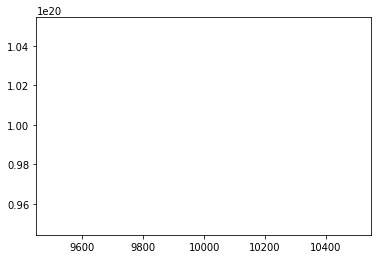

In [6]:
import math
import matplotlib.pyplot as plt

def f(x):
    return ((x**5)-(x**4)-2*(x**3)-(x**2)+x-3);

for i in range(10000):
    x = i
    y = f(i)
    
plt.plot(x, y, 'red')
plt.show()

In [23]:
import math

def f(x):
    return ((x**5)-(x**4)-2*(x**3)-(x**2)+x-3);

# init
x_l =0;
x_u =1;
x = (x_u + x_l)/ 2;

#iterate
while ( abs(f(x)) > 0.1): # till we are very close to zero
    
    print(x_l, x_u)
    
    x = (x_u + x_l)/2 ; # middle point
    if f(x) > 0: # adjust x_l
        x_l = x;
    else: # adjust x_u
        x_u = x;
        
    print(f(x), x_l, x_u)
        
print("x:" + str(x) + "\t f(x): " + str(f(x)))

0 1
-3.03125 0 0.5
0 0.5
-2.8466796875 0 0.25
0 0.25
-2.894744873046875 0 0.125
0 0.125
-2.941908836364746 0 0.0625
0 0.0625
-2.969788521528244 0 0.03125
0 0.03125
-2.9846268286928535 0 0.015625
0 0.015625
-2.992249492526753 0 0.0078125
0 0.0078125
-2.996109128230273 0 0.00390625
0 0.00390625
-2.9980507046129503 0 0.001953125
0 0.001953125
-2.99902439303787 0 0.0009765625
0 0.0009765625
-2.9995119574014666 0 0.00048828125
0 0.00048828125
-2.999755919008752 0 0.000244140625
0 0.000244140625
-2.999877944592299 0 0.0001220703125
0 0.0001220703125
-2.999938968569495 0 6.103515625e-05
0 6.103515625e-05
-2.9999694833532544 0 3.0517578125e-05
0 3.0517578125e-05
-2.9999847414437752 0 1.52587890625e-05
0 1.52587890625e-05
-2.9999923706636773 0 7.62939453125e-06
0 7.62939453125e-06
-2.9999961853172863 0 3.814697265625e-06
0 3.814697265625e-06
-2.999998092655005 0 1.9073486328125e-06
0 1.9073486328125e-06
-2.999999046326593 0 9.5367431640625e-07
0 9.5367431640625e-07
-2.999999523163069 0 4.768371

0 9.322925914000258e-156
-3.0 0 4.661462957000129e-156
0 4.661462957000129e-156
-3.0 0 2.3307314785000646e-156
0 2.3307314785000646e-156
-3.0 0 1.1653657392500323e-156
0 1.1653657392500323e-156
-3.0 0 5.826828696250162e-157
0 5.826828696250162e-157
-3.0 0 2.913414348125081e-157
0 2.913414348125081e-157
-3.0 0 1.4567071740625404e-157
0 1.4567071740625404e-157
-3.0 0 7.283535870312702e-158
0 7.283535870312702e-158
-3.0 0 3.641767935156351e-158
0 3.641767935156351e-158
-3.0 0 1.8208839675781755e-158
0 1.8208839675781755e-158
-3.0 0 9.104419837890877e-159
0 9.104419837890877e-159
-3.0 0 4.552209918945439e-159
0 4.552209918945439e-159
-3.0 0 2.2761049594727193e-159
0 2.2761049594727193e-159
-3.0 0 1.1380524797363597e-159
0 1.1380524797363597e-159
-3.0 0 5.6902623986817984e-160
0 5.6902623986817984e-160
-3.0 0 2.8451311993408992e-160
0 2.8451311993408992e-160
-3.0 0 1.4225655996704496e-160
0 1.4225655996704496e-160
-3.0 0 7.112827998352248e-161
0 7.112827998352248e-161
-3.0 0 3.5564139991761

0 5.696189077778436e-306
-3.0 0 2.848094538889218e-306
0 2.848094538889218e-306
-3.0 0 1.424047269444609e-306
0 1.424047269444609e-306
-3.0 0 7.120236347223045e-307
0 7.120236347223045e-307
-3.0 0 3.5601181736115222e-307
0 3.5601181736115222e-307
-3.0 0 1.7800590868057611e-307
0 1.7800590868057611e-307
-3.0 0 8.900295434028806e-308
0 8.900295434028806e-308
-3.0 0 4.450147717014403e-308
0 4.450147717014403e-308
-3.0 0 2.2250738585072014e-308
0 2.2250738585072014e-308
-3.0 0 1.1125369292536007e-308
0 1.1125369292536007e-308
-3.0 0 5.562684646268003e-309
0 5.562684646268003e-309
-3.0 0 2.781342323134e-309
0 2.781342323134e-309
-3.0 0 1.390671161567e-309
0 1.390671161567e-309
-3.0 0 6.953355807835e-310
0 6.953355807835e-310
-3.0 0 3.4766779039175e-310
0 3.4766779039175e-310
-3.0 0 1.73833895195875e-310
0 1.73833895195875e-310
-3.0 0 8.691694759794e-311
0 8.691694759794e-311
-3.0 0 4.345847379897e-311
0 4.345847379897e-311
-3.0 0 2.1729236899484e-311
0 2.1729236899484e-311
-3.0 0 1.08646184

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0

0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0.0
-3.0 0 0.0
0 0

KeyboardInterrupt: 

### Problem 4: Find area under a curve sin(x)/x in the interval [-10, 10]
- Gogole "plot sin(x)/x"
- Sorry, "Gogol" is a russian author. Please "Google"!

In [19]:
# images-source: http://www.mathcs.emory.edu/~cheung/Courses/170/Syllabus/07/rectangle-method.html
from IPython.display import Image
Image(url= "http://www.mathcs.emory.edu/~cheung/Courses/170/Syllabus/07/FIGS/rectangle05.gif")


In [20]:
Image(url= "http://www.mathcs.emory.edu/~cheung/Courses/170/Syllabus/07/FIGS/rectangle06.gif")